In [2]:
import numpy as np

In [2]:
def k(k0, Ea, T, R=8.3145):
    """Calculate the cinetic constant of Arrhneius.

    Args:
        k0 (float): the pre-exponencial factor.
        Ea (float): activation energy in [kJ/mol].
        T(float): Temperature in [K].
        R (float): The gas constant in [J/(mol.K)].

    Returns:
        float: The constant cinetic.
    """
    return k0 * np.exp(-Ea*1e3 / (R * T))

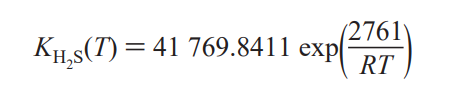

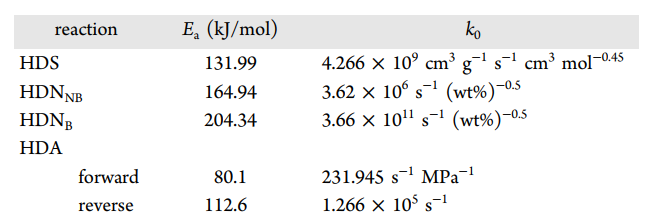

In [ ]:
def fKH2S(T, k0 = 41769.8411, delta_Hads=2761 ,R = 8.3145):
    """Calculate the equilibrium constant of hydrodessulfulrization.

    Args:
        T(float): Temperature in [K].
        k0 (float): the pre-exponencial factor.
        delta_Hads (float): delta energy of adsorption in [J/mol].
        R (float): The gas constant in [J/(mol.K)].

    Returns:
        float: The equilibrium constant in [cm^3/mol].

    """
    return  k0* np.exp(delta_Hads / (R * T))

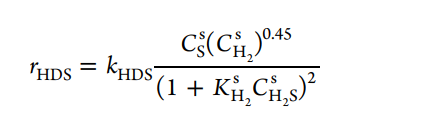

In [ ]:
def rHDS(CS, CH2, CH2S, T):
    """ Calculate the HDS reaction rate.
    Args:
        CS (float): Concentration OF sulfur compounds in [mol/cm^3].
        CH2 (float): Concentration of hydrogen in [mol/cm^3].
        CH2S (float): Concentration of hydrogen sulfide in [mol/cm^3].
        T (float): Temperature in [K].

    Returns:
        float: The HDS reaction rate in [mol/s].
    """

    return k(4.266e9, 131.99, T) * CS * CH2**2/(1 + fKH2S(T) * CH2S)**2

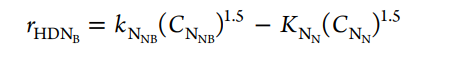

In [3]:
def rHDN_NB(CN_NB, CN_B, T):
    """ Calculate the HDN_NB reaction rate.
    Args:
        CN_NB (float): Concentration of non-basic-nitrogen compounds in [wt%].
        CN_B (float): Concentration of basic-nitrogen in [wt%].
        T (float): Temperature in [K].

    Returns:
        float: the HDN_NB reaction rate in [wt%/s].
    """

    return k(3.62e6, 164.94, T) * CN_NB**1.5 - k(3.62e6, 164.94, T) * CN_B**1.5


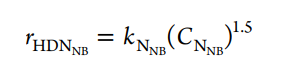

In [ ]:
def rHDN_B(CN_NB,T):
    """ Calculate the HDN_B reaction rate.
    Args:
        CN_NB (float): Concentration of non-basic-nitrogen compounds in [wt%].
        T (float): Temperature in [K].

    Returns:
        float: the HDN_B reaction rate in [wt%/s].
    """

    return k(3.66*10*81, 204.34) * CN_NB,T**1.5


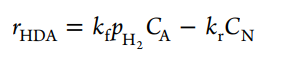

In [ ]:
def rHDA(pH2, CA, CN, T):
    """ Calculate the HDA reaction rate.
    Args:
        pH2 (float): partial pressure of hydrogen in [MPa]
        CA (float): Concentration of aromatic compounds in [%].
        CN (float): Concentration of naphthenes in [%]
        T (float): Temperature in [K].

    Returns:
        float: the HDA reaction rate in [%/s].
    """

    return k(231.945, 80.1, T) * pH2 * CA - k(1.266e5, 112.6,T) * CN

CA + CN = 1

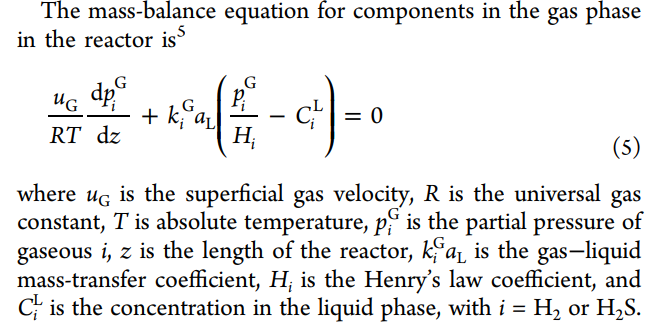

In [ ]:
def mass_balance_gas_phase2(rho0, P, T, piG, CiL, kiG_aL, uG, R=8.3145):

    return - kiG_aL * (piG / Henry_coefficient2(rho0, P, T) - CiL) * R * T / uG

In [ ]:
def mass_balance_gas_phase4(rho0, P, T, piG, CiL, kiG_aL, uG, R=8.3145):

    return - kiG_aL * (piG / Henry_coefficient4(rho0, P, T) - CiL) * R * T / uG

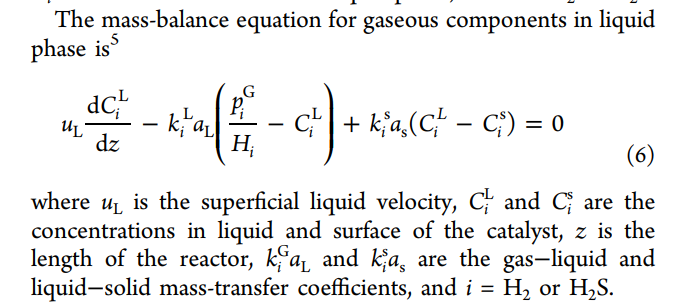

In [ ]:
def mass_balance_gas_liquid_phase2(rho0, P, T, piG, CiL, CiS, kiL_aL,kiS_aS, uL):

    return (kiL_aL * (piG / Henry_coefficient2(rho0, P, T) - CiL) - kiS_aS * (CiL - CiS)) / uL

In [ ]:
def mass_balance_gas_liquid_phase4(rho0, P, T, piG, CiL, CiS, kiL_aL,kiS_aS, uL):

    return (kiL_aL * (piG / Henry_coefficient4(rho0, P, T) - CiL) - kiS_aS * (CiL - CiS)) / uL

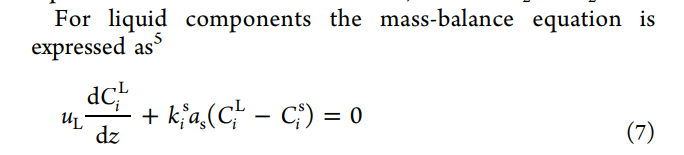

In [ ]:
def mass_balance_liquid(CiL, CiS, kiS_aS, uL):

    return - (CiL - CiS) * kiS_aS / uL


Estudar amanhã: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.02-The-Shooting-Method.html

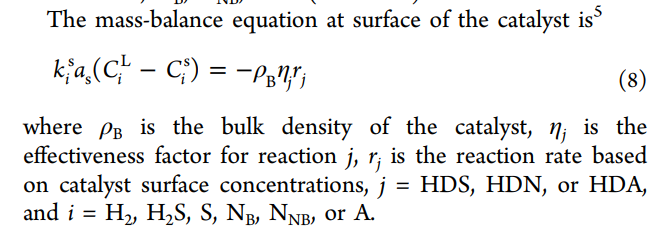

In [12]:
#conjuntos utilizados por enquanto apenas para testar uma ideia.

[H2, H2S, S, N_B, N_NB, A] = I =  np.arange(6)

[HDS, HDN, HDA] = J = np.arange(3)  

Resolver primeiro considerando o termo "effectiveness" constante e apenas a reação de hidrodessulfurização.

Considerar valor igual a 1 visto que a efetividade está inclusa na velocidade da reação segundo parágrafo abaixo

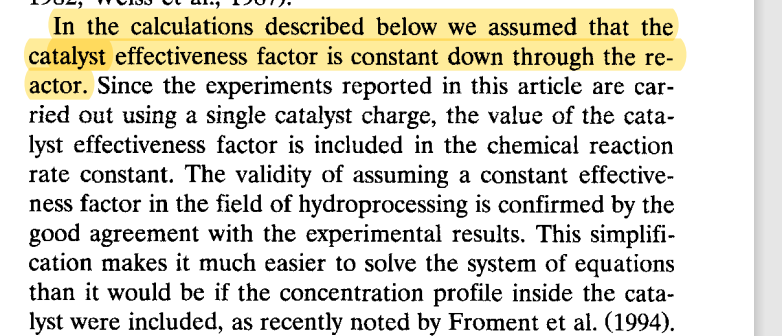